<h3> Exploring Decision Tree Model and it's hyper-parameters</h3>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
data = pd.read_csv('./Datasets/penguins_size.csv')
data = data.dropna()
data = data[data['sex']!='.']

In [17]:
X = pd.get_dummies(data.drop('species' , axis=1) , dtype=int , drop_first=True)
y = data['species']

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

- Simple Decision Tree

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]


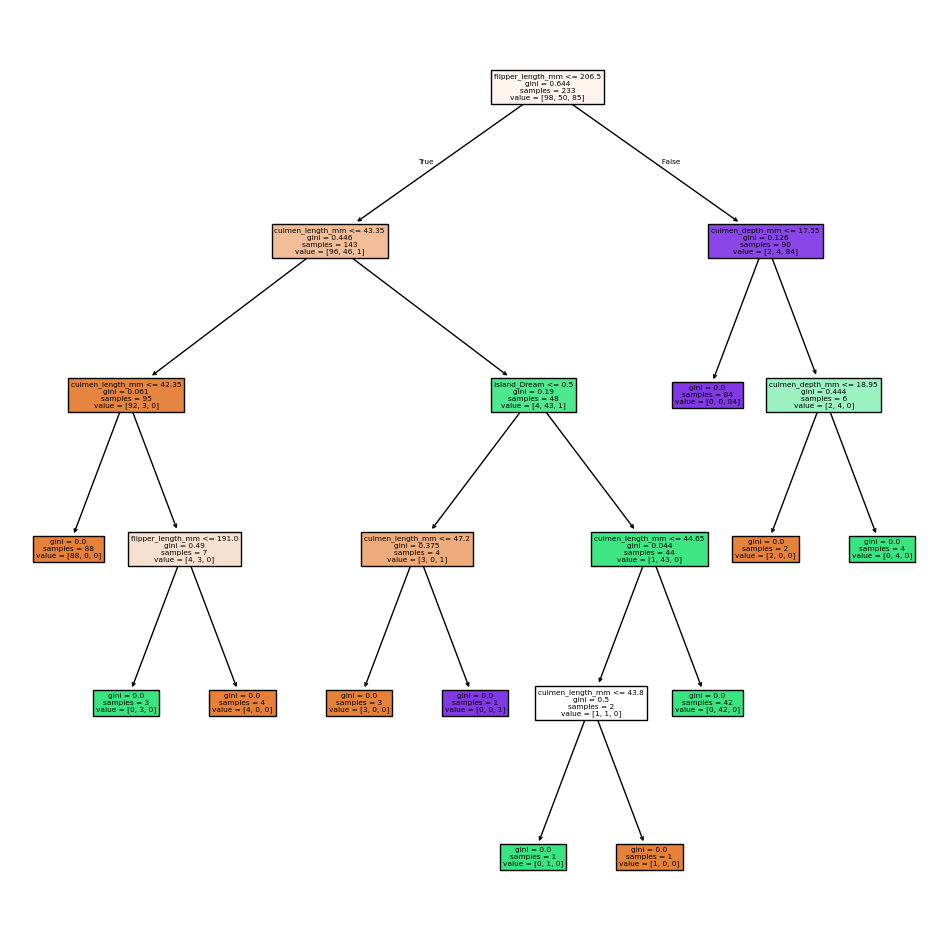

In [20]:
from textwrap import fill
from turtle import color
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train , y_train)

base_pred = model.predict(X_test)
print(classification_report(y_test , base_pred))
print(confusion_matrix(y_test , base_pred))

from sklearn.tree import plot_tree
fig = plt.figure(figsize=[12 , 12] , dpi=100)
plot_tree(model , feature_names=X.columns , filled=True)
plt.show()

- Describing a Tree

    - Each node has parameters that tell us about the node.

    - First of all the 'feature name' of 'index' like 'X[n]' is telling what feature out of X features is selected to be splitted on.

    - Second is the gini impurity deciding how much the data is pure ( only has one class ).

    - Third is 'Samples' which makes sense since our training set has 233 points and all are entering the nodes.

    - Last is 'Value' which tells us the no. of points from each class from the 'Samples'

- To see how a feature is important decision making

In [19]:
#  model.feature_importances_ # Outputs the importances in same order as 
                           # the features in the dataset

# Making a dataframe for simplicity
pd.DataFrame(index=X.columns , data=model.feature_importances_ , columns=['Feature Importances']).sort_values('Feature Importances')

,Feature Importances
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
island_Dream,0.060643
culmen_depth_mm,0.082495
culmen_length_mm,0.347562
flipper_length_mm,0.509300


- Making a function to simplify the test and visualizing Decision Tree

In [21]:
def report_model(model):
    model_pred = model.predict(X_test)

    print(classification_report(y_test , model_pred))
    print(confusion_matrix(y_test , model_pred))

    fig = plt.figure(figsize=[12 , 12] , dpi=100)
    plot_tree(model , feature_names=X.columns , filled=True)
    plt.show()

- Hyper-Params

    - criterion : choices between the mathematical functions to measure the quality of a split. { gini , entropy , log_loss } 

    - max_depth : maximum depth of the tree allowed / level of splits allowed. Default is none , if none then tree will grow until the impurity becomes 0 or close to 0

    - max_leaf_nodes : max leaf nodes allowed with each split , if none then unlimited leaf node splits are possible.

- Note : Decision Tree are prone to overfitting , thus we can further use some new Trees like Random Forest and Gradient-Boosted Trees to deal with it.